In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

A01 = simplePartsOfSpeech(txt, "VERB", "Tense=Past"

A03 = simplePartsOfSpeech(txt, "VERB", "Tense=Pres"

I39 = simplePartsOfSpeech(txt, "ADP")

I41 = predicativeAdjectives(txt)

I40 = simplePartsOfSpeech(txt, "ADJ")

I42 = simplePartsOfSpeech(txt, "ADV")

B04 = posWithLemmaFilter(txt, "", "placeAdverbials")

B05 = posWithLemmaFilter(txt, '', 'timeAdverbials')

C06 = posWithLemmaFilter(txt, '', 'firstPersonPronouns')

C07 = posWithLemmaFilter(txt, 'PRON', 'secondPersonPronouns')

C08 = posWithLemmaFilter(txt, '', 'thirdPersonPronouns')

C09 = posWithLemmaFilter(txt, '', "itWord") # impersonal

C11 = posWithLemmaFilter(txt, '', 'indefinitePronouns')

D13 = posWithLemmaFilter(txt, '', 'whQuestions')

H23 = posWithLemmaFilter(txt, '', 'whMarkers')

H34 = posWithLemmaFilter(txt, '', "sentenceRelatives") # Bob likes fried mangoes, which is the most disgusting

H35 = posWithLemmaFilter(txt, '', "becauseWord")

H36 = posWithLemmaFilter(txt, '', 'concessives')

H37 = posWithLemmaFilter(txt, '', 'conditionalSubordination')

K46 = posWithLemmaFilter(txt, '', 'downtopers')

K47 = posWithLemmaFilter(txt, '', 'generalHedges')

K48 = posWithLemmaFilter(txt, '', 'amplifiers')

K49 = posWithLemmaFilter(txt, '', 'generalEmphatics')

L52 = posWithLemmaFilter(txt, '', 'possibilityModals')

L53 = posWithLemmaFilter(txt, '', 'necessityModals')

L54 = posWithLemmaFilter(txt, '', 'predictionModals')

K55 = posWithLemmaFilter(txt, 'VERB', 'publicVerbs')

K56 = posWithLemmaFilter(txt, 'VERB', 'privateVerbs')

K57 = posWithLemmaFilter(txt, '', 'suasiveVerbs')

K58 = posWithLemmaFilter(txt, '', 'seemappear')

P67 = posWithLemmaFilter(txt, '', "notWord")

C10 = demonstrativePronouns(txt)

C12 = doAsProVerb(txt) # korras

E14 = nominalizations(txt)

#gerund list missing

E16 = (simplePartsOfSpeech(txt, "NOUN")[0])-dimlist['E14'] # we substract nominalizations

F18 = BYpassives(txt) # to debug

G19 = beAsMainVerb(txt)

H25 = presentParticipialClauses(txt)

H33 = piedPiping(txt) # the manner in which he was told

H38 = osubordinators(txt)


J43 = typeTokenRatio(txt)

J44 = wordLength(txt)

K45 = conjuncts(txt)

K50 = discourseParticles(txt)

N59 = contractions(txt)

N60 = thatDeletion(txt)

P66 = syntheticNegation(txt)

N61 = strandedPrepositions(txt)

In [3]:
abstr_data = pd.read_csv('./andmetabelid/dim_all_abs.csv')
aeg_data = pd.read_csv('./andmetabelid/dim_all_aeg.csv')
afek_data = pd.read_csv('./andmetabelid/dim_all_afek.csv')
arg_data = pd.read_csv('./andmetabelid/dim_all _arg.csv')
form_data = pd.read_csv('./andmetabelid/dim_all_form.csv')
imp_data = pd.read_csv('./andmetabelid/dim_all_imp.csv')
info_data = pd.read_csv('./andmetabelid/dim_all_info.csv')
inst_data = pd.read_csv('./andmetabelid/dim_all_inst.csv')
inter_data = pd.read_csv('./andmetabelid/dim_all_inter.csv')
keer_data = pd.read_csv('./andmetabelid/dim_all_keer.csv')
subj_data = pd.read_csv('./andmetabelid/dim_all_subj.csv')


In [4]:
final_variables = abstr_data.columns.values.tolist()[:-1]

In [5]:
def logistric_regression(X, y):
    logreg = LogisticRegression().fit(X,y)

    return logreg

In [6]:
def plot_important_features(model, dimname):
    
    print(model.coef_)

    feature_importance = abs(model.coef_[0])
    
    
    # print(feature_importance)
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    # print(feature_importance)
    sorted_idx = np.argsort(feature_importance)
    # print(sorted_idx)
    pos = np.arange(sorted_idx.shape[0]) + .5
    # print(pos)

    featfig = plt.figure(figsize=(15,20))
    featax = featfig.add_subplot(1, 1, 1)

    featax.barh(pos, feature_importance[sorted_idx], align='center')
    featax.set_yticks(pos)
    featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=10)
    featax.set_xlabel(f'Relative Feature Importance {str.upper(dimname)}')

    # plt.tight_layout()   
    plt.show()

('A01', -0.41013518281778555)
('A03', 0.15716295655692578)
('I39', 0.5431972792556512)
('I41', 0.0055241394453657095)
('I40', 0.3339056174883722)
('I42', -0.05675587343542112)
('B04', -0.05179149466057641)
('B05', -0.0689865207572393)
('C06', -0.07299855325801417)
('C07', -0.04665378100416979)
('C08', -0.7157416600733533)
('C09', -0.0025318084725490892)
('C11', -0.03157414895422818)
('D13', -0.09440770842024268)
('H23', 0.008923253422451488)
('H34', 0.09809143783610325)
('H35', 0.007955661555334764)
('H36', -0.0009353959076061783)
('H37', 0.04044601986399516)
('K46', 0.016485122433843237)
('K47', -0.004186962567335066)
('K48', 0.01773047347909185)
('K49', -0.013300550090934768)
('L52', 0.04768684676906521)
('L53', 0.022512298192889586)
('L54', -0.04877932807754089)
('K55', -0.0856146598658385)
('K56', 0.012322003475963348)
('K57', -0.030684604419772613)
('K58', 0.009905926509783775)
('P67', -0.048301076693450726)
('C10', 0.15641167120423738)
('C12', -0.03286945088247322)
('E14', 0.4434

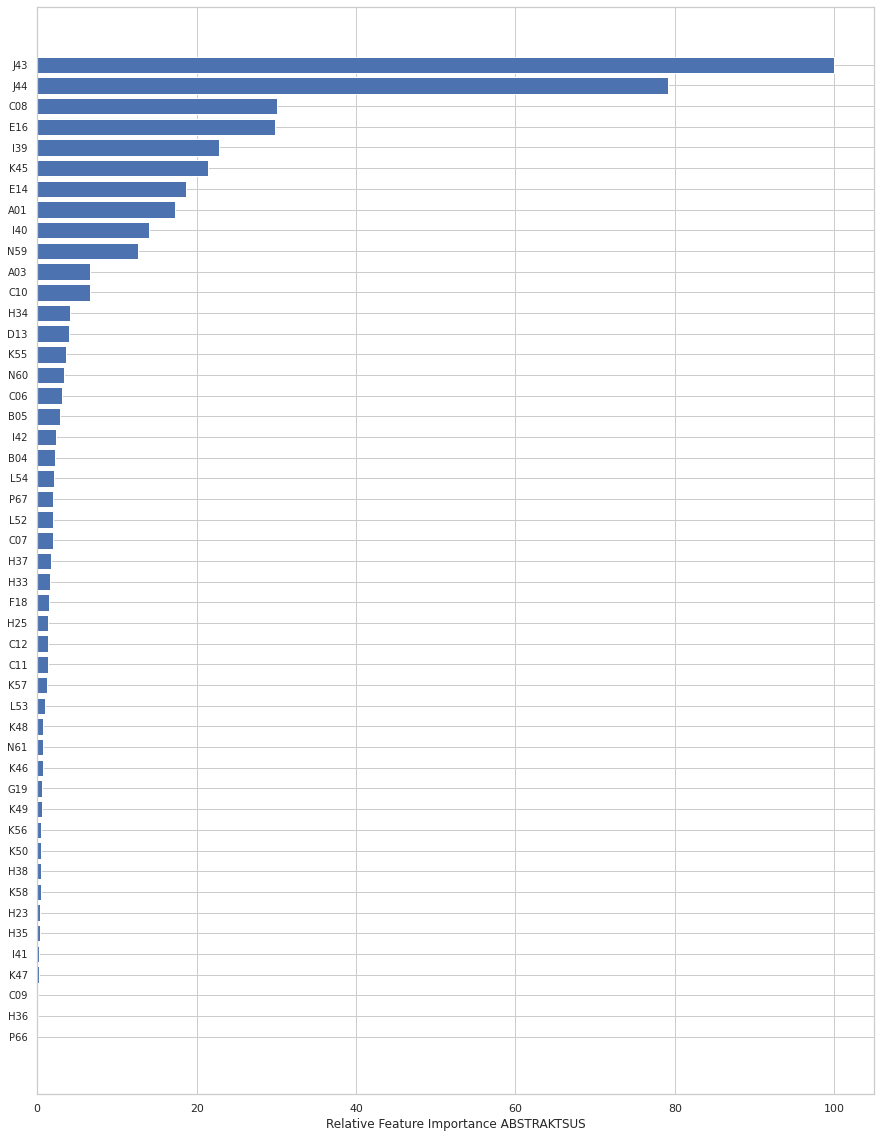

In [51]:
X = abstr_data[final_variables]
y = abstr_data.DIM

model = logistric_regression(X, y)
for z in list(zip(final_variables, model.coef_[0])):
    print(z)

plot_important_features(model, 'abstraktsus')


In [8]:
logit_model = sm.Logit(y,X)
result = logit_model.fit()
print(result.summary2())

         Current function value: 0.153540
         Iterations: 35
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.187     
Dependent Variable: DIM              AIC:              817.9465  
Date:               2022-04-12 18:27 BIC:              1094.5511 
No. Observations:   2351             Log-Likelihood:   -360.97   
Df Model:           47               LL-Null:          -444.22   
Df Residuals:       2303             LLR p-value:      2.8857e-15
Converged:          0.0000           Scale:            1.0000    
No. Iterations:     35.0000                                      
-----------------------------------------------------------------
        Coef.     Std.Err.     z    P>|z|     [0.025     0.975]  
-----------------------------------------------------------------
A01      -8.7348    19.1278 -0.4567 0.6479    -46.2247    28.7550
A03       2.2626    23.4452  0.0965 0.9231    -43.6892    48.2144
I39      -2.7314     9.2932 -0.2939 

/home/kristiina/.virtualenvs/limesurvey/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


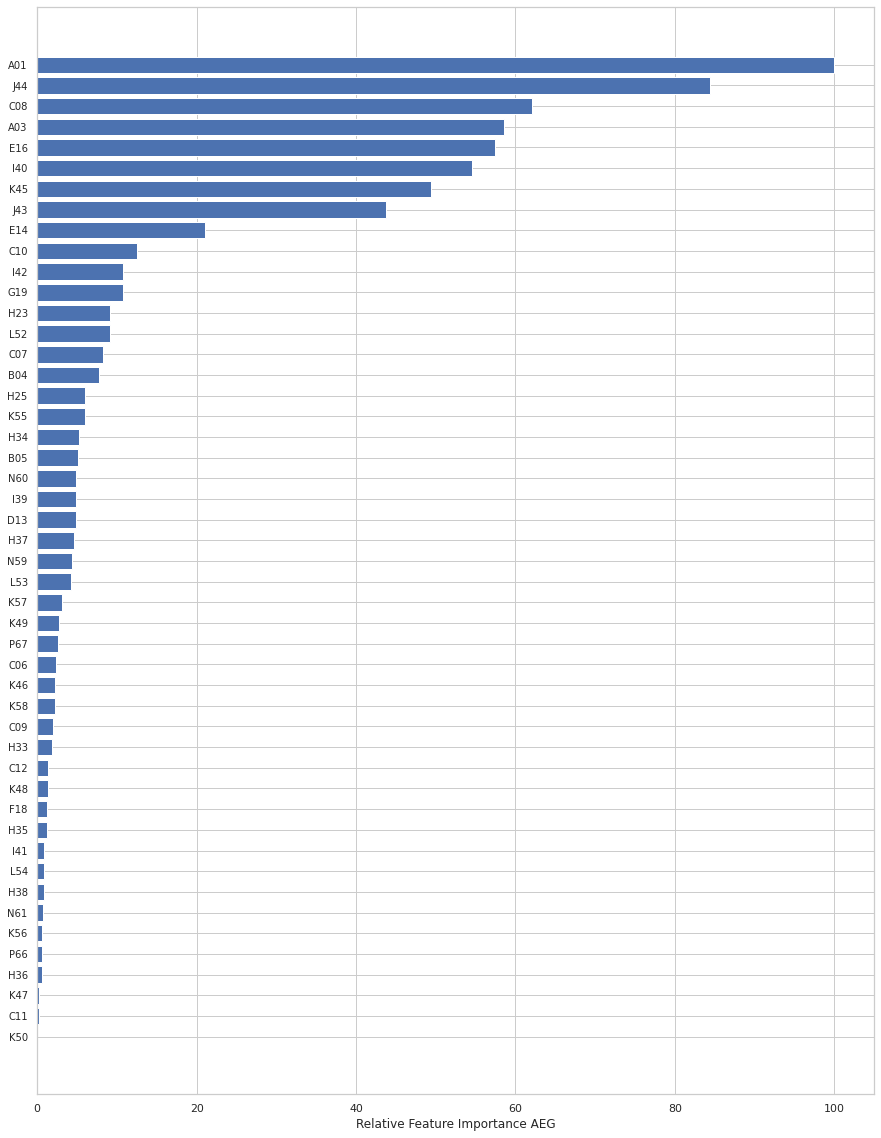

In [9]:
X = aeg_data[final_variables]
y = aeg_data.DIM

model = logistric_regression(X, y)
for z in list(zip(final_variables, model.coef_[0])):
    print(z)
plot_important_features(model, 'aeg')

In [10]:
logit_model = sm.Logit(y,X)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.261298
         Iterations 9
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.093     
Dependent Variable: DIM              AIC:              1324.6222 
Date:               2022-04-12 18:27 BIC:              1601.2268 
No. Observations:   2351             Log-Likelihood:   -614.31   
Df Model:           47               LL-Null:          -676.95   
Df Residuals:       2303             LLR p-value:      4.8398e-09
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     9.0000                                       
------------------------------------------------------------------
           Coef.    Std.Err.     z     P>|z|     [0.025    0.975] 
------------------------------------------------------------------
A01         7.1109   11.7864   0.6033  0.5463   -15.9901   30.2119
A03       -42.7971   18.6693  -2.2924  0.0219   -79.3882   -6.

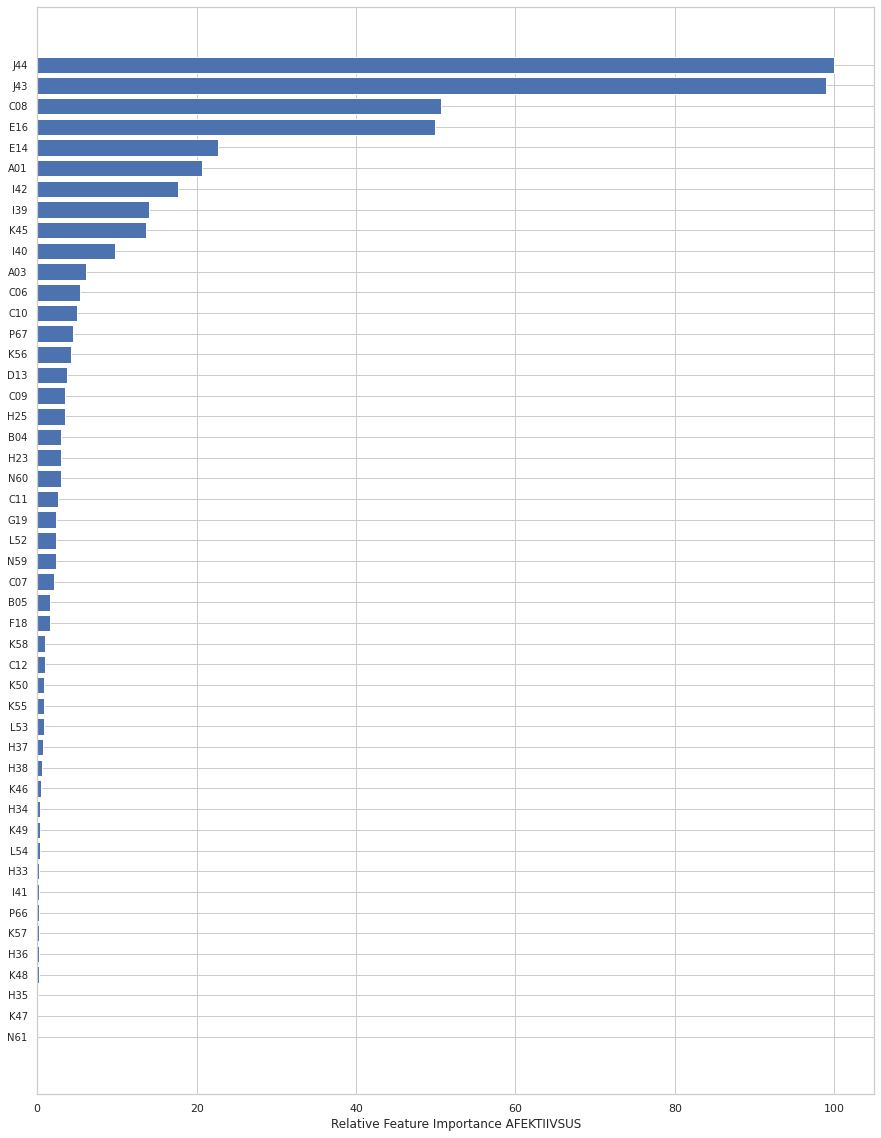

In [11]:
X = afek_data[final_variables]
y = afek_data.DIM

model = logistric_regression(X, y)
for z in list(zip(final_variables, model.coef_[0])):
    print(z)
plot_important_features(model, 'afektiivsus')

In [12]:
logit_model = sm.Logit(y,X)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.287846
         Iterations 10
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.122     
Dependent Variable: DIM              AIC:              1449.4534 
Date:               2022-04-12 18:27 BIC:              1726.0580 
No. Observations:   2351             Log-Likelihood:   -676.73   
Df Model:           47               LL-Null:          -770.62   
Df Residuals:       2303             LLR p-value:      9.8640e-19
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     10.0000                                      
------------------------------------------------------------------
           Coef.    Std.Err.     z     P>|z|     [0.025    0.975] 
------------------------------------------------------------------
A01        -6.7501   11.6699  -0.5784  0.5630   -29.6225   16.1224
A03        -7.6820   16.5197  -0.4650  0.6419   -40.0599   24

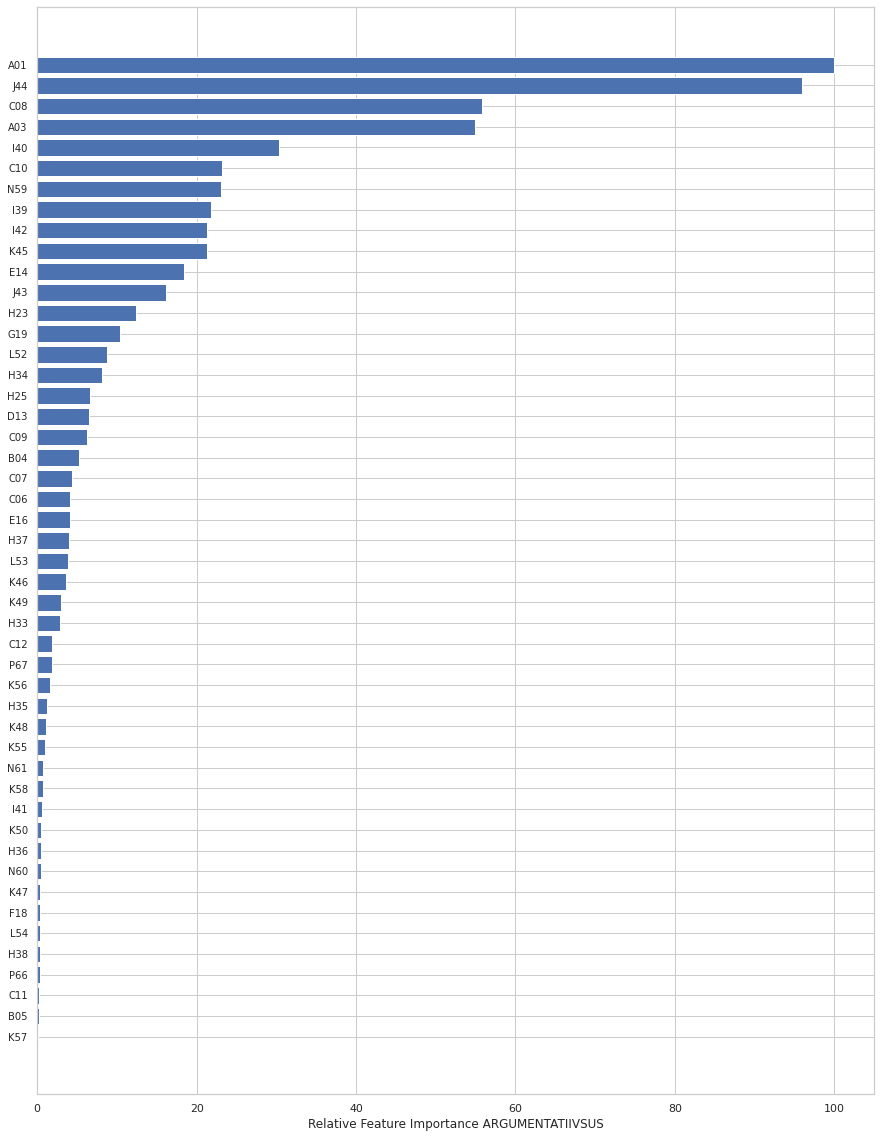

In [13]:
X = arg_data[final_variables]
y = arg_data.DIM

model = logistric_regression(X, y)
for z in list(zip(final_variables, model.coef_[0])):
    print(z)
plot_important_features(model, 'argumentatiivsus')

In [14]:
logit_model = sm.Logit(y,X)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.282859
         Iterations 15
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.109     
Dependent Variable: DIM              AIC:              1426.0012 
Date:               2022-04-12 18:27 BIC:              1702.6058 
No. Observations:   2351             Log-Likelihood:   -665.00   
Df Model:           47               LL-Null:          -746.32   
Df Residuals:       2303             LLR p-value:      1.1825e-14
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     15.0000                                      
------------------------------------------------------------------
          Coef.    Std.Err.     z     P>|z|     [0.025     0.975] 
------------------------------------------------------------------
A01      -32.5894   12.7782  -2.5504  0.0108    -57.6343   -7.5445
A03        7.8721   15.2799   0.5152  0.6064    -22.0760   37

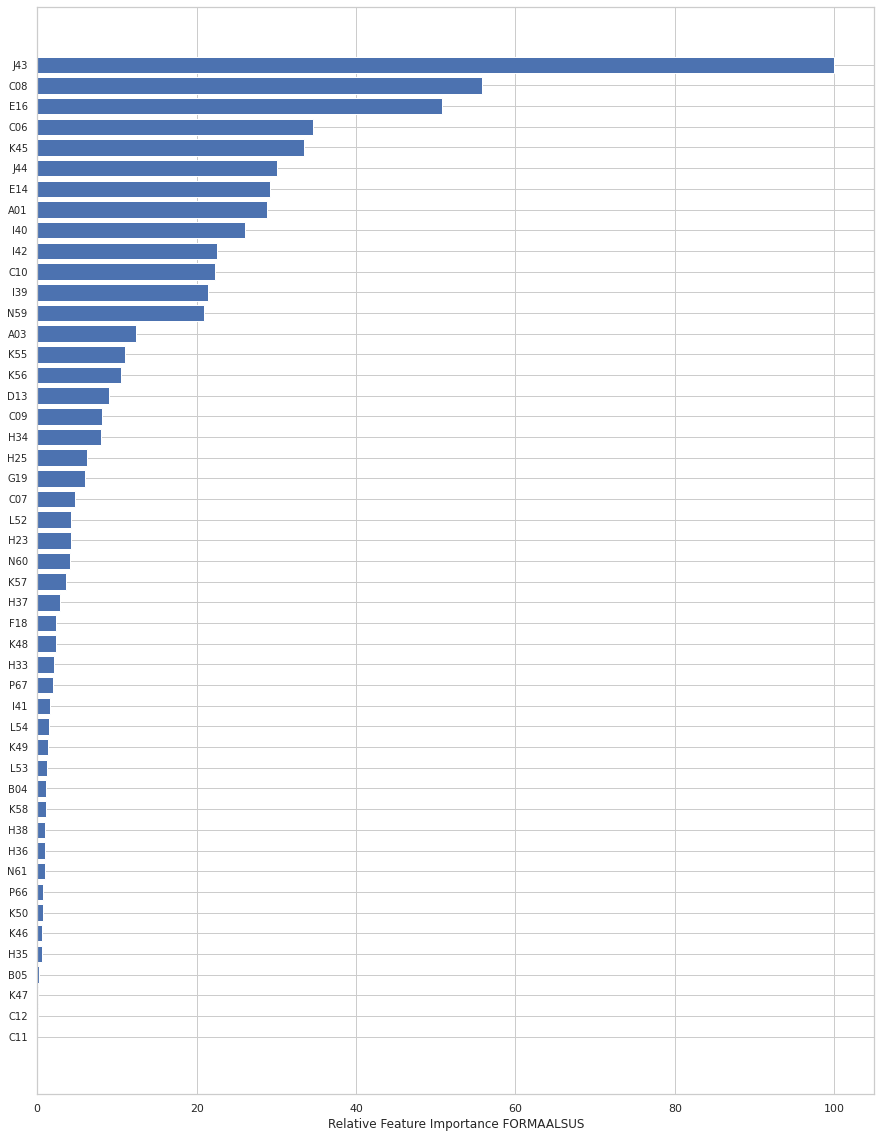

In [15]:
X = form_data[final_variables]
y = form_data.DIM

model = logistric_regression(X, y)
for z in list(zip(final_variables, model.coef_[0])):
    print(z)
plot_important_features(model, 'formaalsus')

In [16]:
logit_model = sm.Logit(y,X)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.515075
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.002    
Dependent Variable: DIM              AIC:              2517.8811
Date:               2022-04-12 18:27 BIC:              2794.4858
No. Observations:   2351             Log-Likelihood:   -1210.9  
Df Model:           47               LL-Null:          -1214.0  
Df Residuals:       2303             LLR p-value:      1.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     7.0000                                      
-----------------------------------------------------------------
          Coef.    Std.Err.     z     P>|z|     [0.025    0.975] 
-----------------------------------------------------------------
A01       -0.6727    8.0014  -0.0841  0.9330   -16.3552   15.0098
A03       -2.9283   10.9245  -0.2680  0.7887   -24.3399   18.4834
I39     

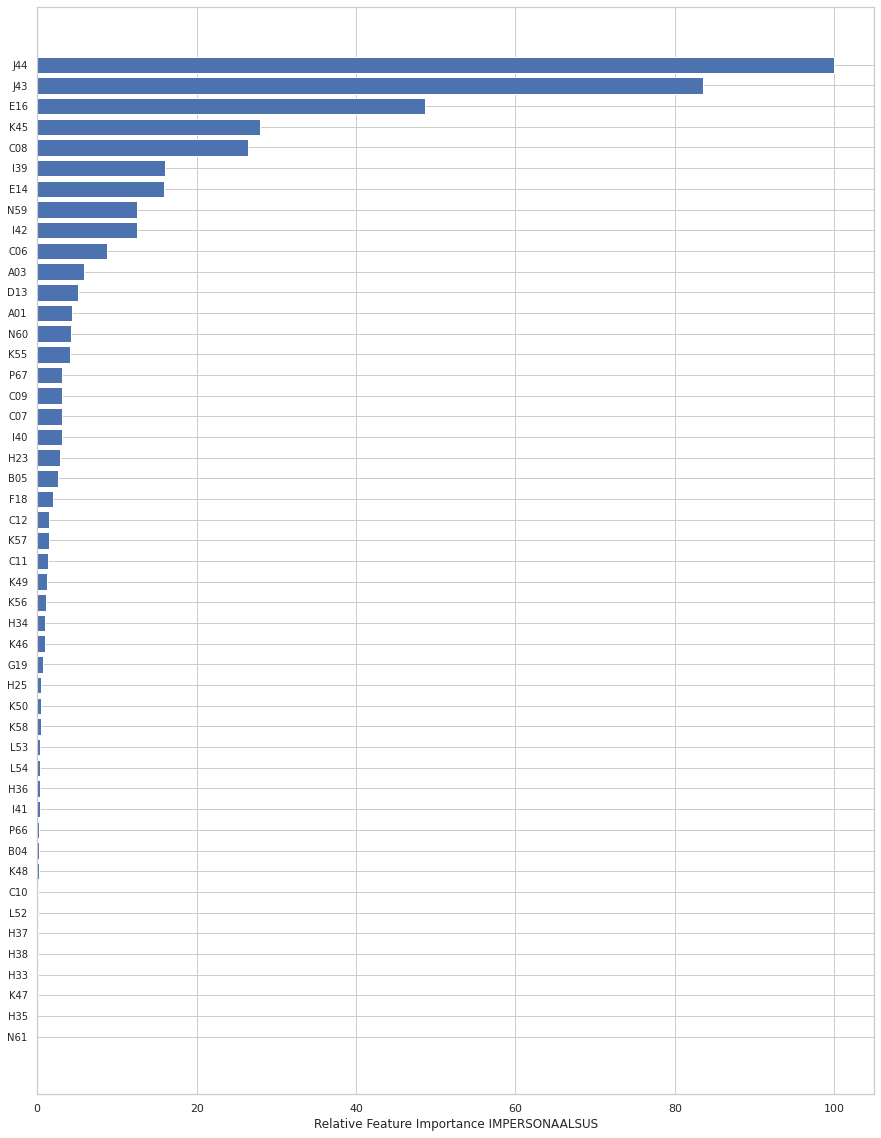

In [17]:
X = imp_data[final_variables]
y = imp_data.DIM

model = logistric_regression(X, y)
for z in list(zip(final_variables, model.coef_[0])):
    print(z)
plot_important_features(model, 'impersonaalsus')

In [18]:
logit_model = sm.Logit(y,X)
result = logit_model.fit()
print(result.summary2())

         Current function value: 0.162625
         Iterations: 35
                         Results: Logit
Model:               Logit            Pseudo R-squared: -0.659   
Dependent Variable:  DIM              AIC:              860.6644 
Date:                2022-04-12 18:27 BIC:              1137.2690
No. Observations:    2351             Log-Likelihood:   -382.33  
Df Model:            47               LL-Null:          -230.41  
Df Residuals:        2303             LLR p-value:      1.0000   
Converged:           0.0000           Scale:            1.0000   
No. Iterations:      35.0000                                     
-----------------------------------------------------------------
       Coef.     Std.Err.     z    P>|z|     [0.025      0.975]  
-----------------------------------------------------------------
A01   -390.0903   153.0362 -2.5490 0.0108   -690.0357    -90.1448
A03    -13.2861   193.9257 -0.0685 0.9454   -393.3735    366.8014
I39    186.1252    79.0716  2.3539 0

/home/kristiina/.virtualenvs/limesurvey/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


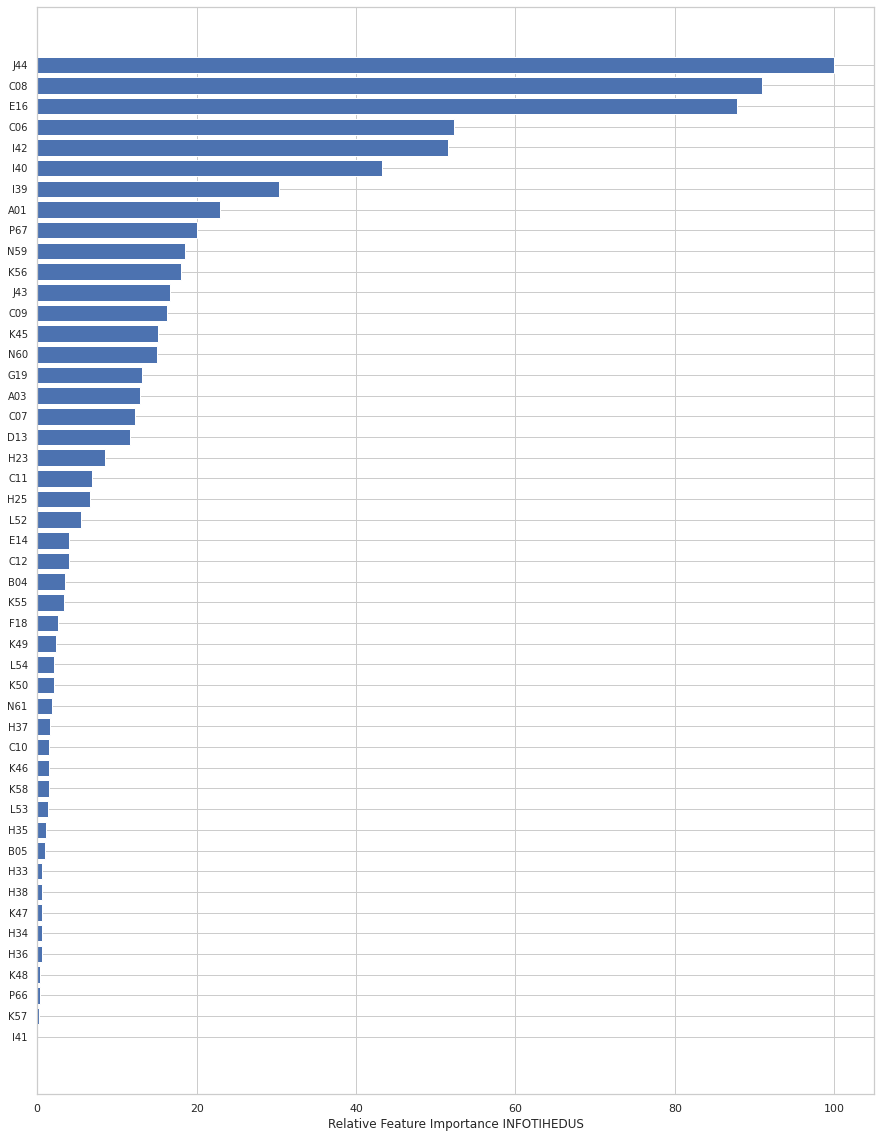

In [19]:
X = info_data[final_variables]
y = info_data.DIM

model = logistric_regression(X, y)
for z in list(zip(final_variables, model.coef_[0])):
    print(z)
plot_important_features(model, 'infotihedus')

In [20]:
logit_model = sm.Logit(y,X)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.291350
         Iterations 16
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.111     
Dependent Variable: DIM              AIC:              1465.9285 
Date:               2022-04-12 18:27 BIC:              1742.5331 
No. Observations:   2351             Log-Likelihood:   -684.96   
Df Model:           47               LL-Null:          -770.62   
Df Residuals:       2303             LLR p-value:      4.8665e-16
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     16.0000                                      
------------------------------------------------------------------
         Coef.    Std.Err.     z     P>|z|     [0.025      0.975] 
------------------------------------------------------------------
A01       3.8755   11.8748   0.3264  0.7442    -19.3988    27.1497
A03       1.5795   15.7020   0.1006  0.9199    -29.1959    32

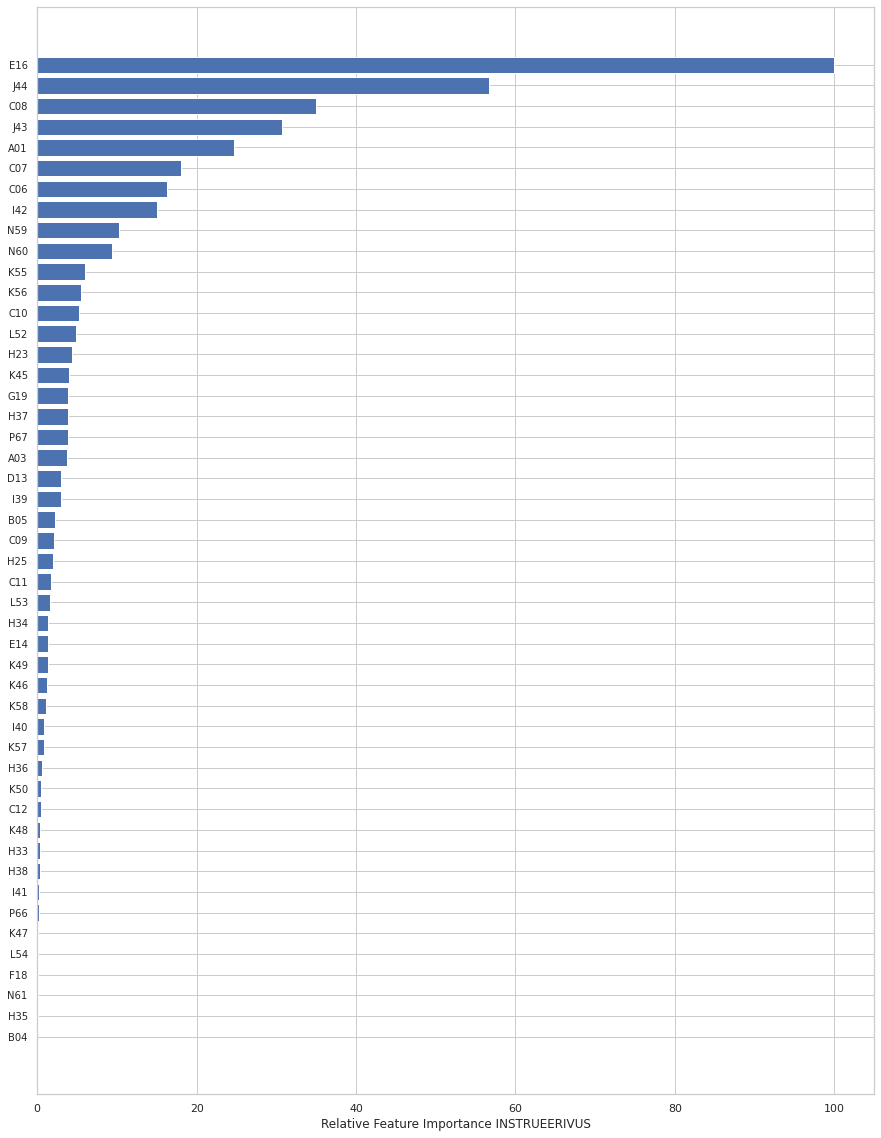

In [21]:
X = inst_data[final_variables]
y = inst_data.DIM

model = logistric_regression(X, y)
for z in list(zip(final_variables, model.coef_[0])):
    print(z)
plot_important_features(model, 'instrueerivus')

In [25]:
logit_model = sm.Logit(y,X)
result = logit_model.fit()
# print(result.summary2())

         Current function value: inf
         Iterations: 35


LinAlgError: Singular matrix

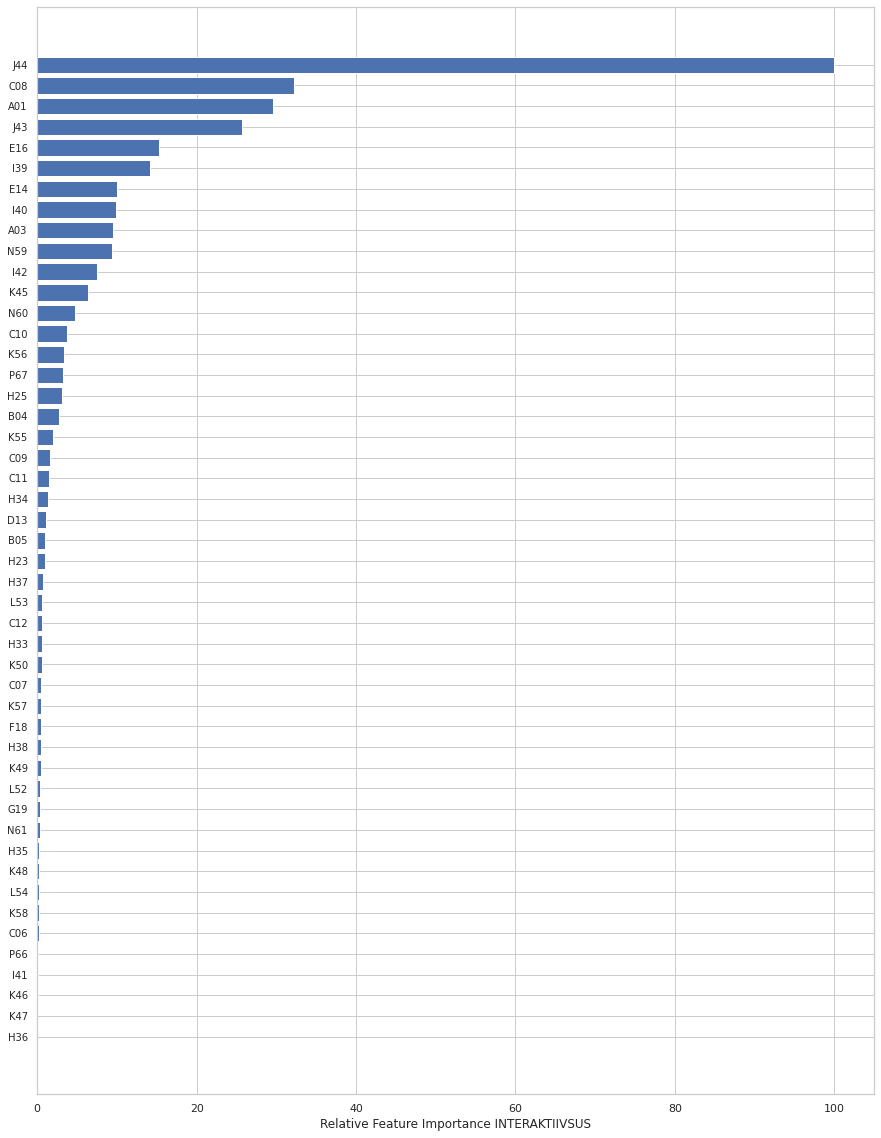

In [26]:
X = inter_data[final_variables]
y = inter_data.DIM

model = logistric_regression(X, y)
for z in list(zip(final_variables, model.coef_[0])):
    print(z)
plot_important_features(model, 'interaktiivsus')

In [27]:
logit_model = sm.Logit(y,X)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.160546
         Iterations 12
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.262     
Dependent Variable: DIM              AIC:              850.8861  
Date:               2022-04-12 18:30 BIC:              1127.4907 
No. Observations:   2351             Log-Likelihood:   -377.44   
Df Model:           47               LL-Null:          -511.17   
Df Residuals:       2303             LLR p-value:      1.2931e-32
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     12.0000                                      
------------------------------------------------------------------
           Coef.    Std.Err.     z     P>|z|     [0.025    0.975] 
------------------------------------------------------------------
A01        27.4840   16.7097   1.6448  0.1000    -5.2663   60.2344
A03        -8.2187   26.4864  -0.3103  0.7563   -60.1312   43

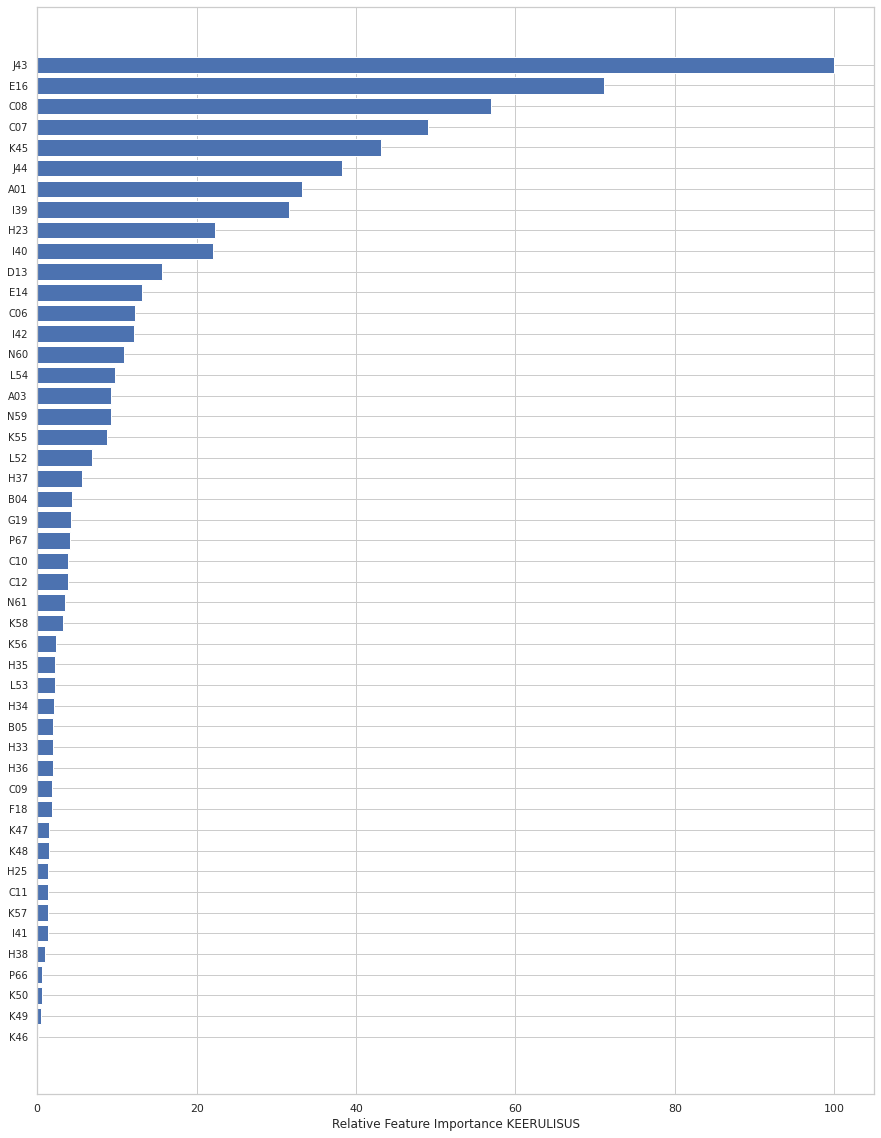

In [28]:
X = keer_data[final_variables]
y = keer_data.DIM

model = logistric_regression(X, y)
for z in list(zip(final_variables, model.coef_[0])):
    print(z)
plot_important_features(model, 'keerulisus')

In [29]:
logit_model = sm.Logit(y,X)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.474413
         Iterations 8
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.007    
Dependent Variable: DIM              AIC:              2326.6908
Date:               2022-04-12 18:30 BIC:              2603.2954
No. Observations:   2351             Log-Likelihood:   -1115.3  
Df Model:           47               LL-Null:          -1123.0  
Df Residuals:       2303             LLR p-value:      1.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     8.0000                                      
-----------------------------------------------------------------
          Coef.    Std.Err.     z     P>|z|     [0.025    0.975] 
-----------------------------------------------------------------
A01       -2.1389    8.4949  -0.2518  0.8012   -18.7885   14.5107
A03       -2.1041   11.5446  -0.1823  0.8554   -24.7312   20.5229
I39     

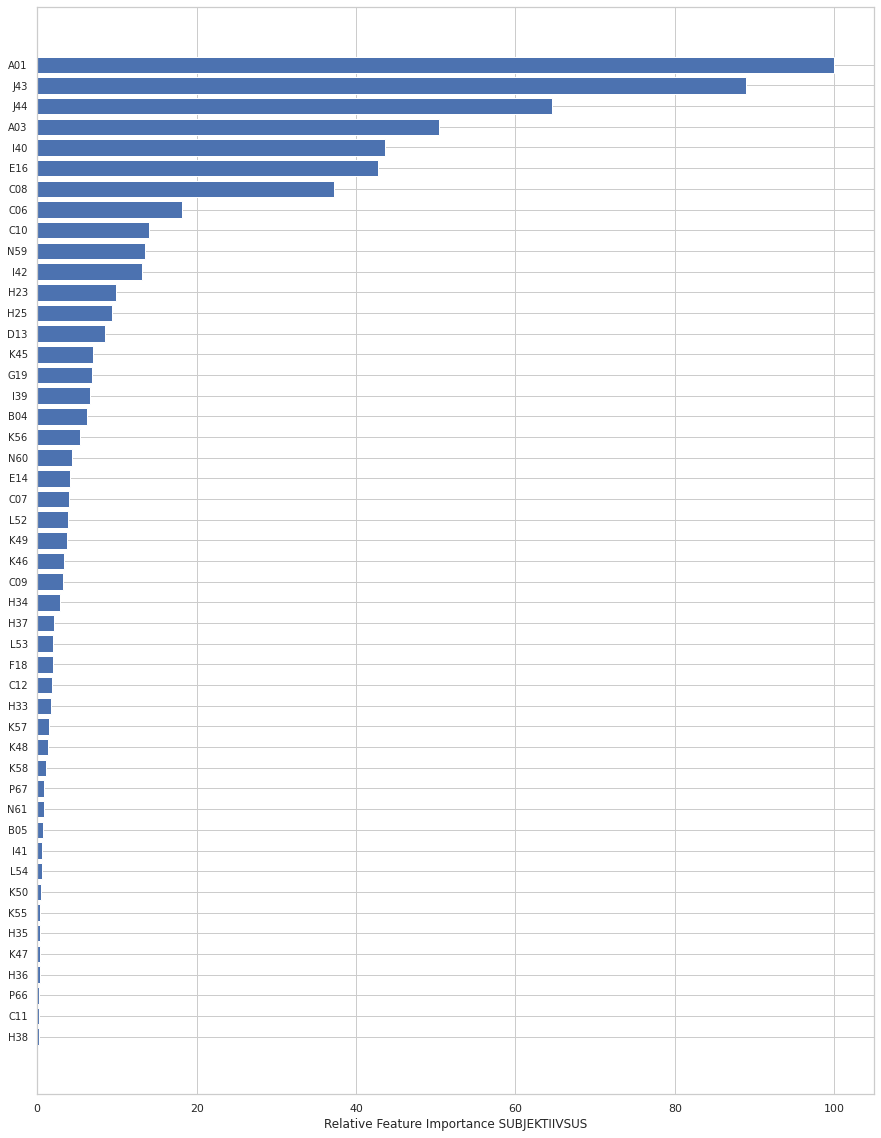

In [30]:
X = subj_data[final_variables]
y = subj_data.DIM

model = logistric_regression(X, y)
for z in list(zip(final_variables, model.coef_[0])):
    print(z)
plot_important_features(model, 'subjektiivsus')

In [31]:
logit_model = sm.Logit(y,X)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.276089
         Iterations 12
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.097     
Dependent Variable: DIM              AIC:              1394.1696 
Date:               2022-04-12 18:30 BIC:              1670.7742 
No. Observations:   2351             Log-Likelihood:   -649.08   
Df Model:           47               LL-Null:          -719.13   
Df Residuals:       2303             LLR p-value:      3.4430e-11
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     12.0000                                      
------------------------------------------------------------------
          Coef.    Std.Err.     z     P>|z|     [0.025     0.975] 
------------------------------------------------------------------
A01      -38.1246   13.2132  -2.8854  0.0039    -64.0219  -12.2273
A03       -0.9563   15.9776  -0.0599  0.9523    -32.2719   30